# Çoklu Lineer Regresyon Projesi

## Araba Fiyat Tahmini

### Problemin Tanımı

1980'lerde Uzak doğu'da yaşayan bir araba üreticisi, Amerika pazarına girmek istemektedir. Bu sebeple, araba fiyatlarına etki eden faktörleri ve önem derecelerini öğrenmek için bir danışmanlık firması ile anlaşır.

Öğrenmek istedikleri:
* Arabaların fiyatlarını belirlemede hangi değişken/değişkenler önemlidir
* Bu değişkenler, araba fiyatlarını ne ölçüde etkilemektedir.

Bu talepler doğrultusunda, danışmanlık firması çeşitli markalar ve modeller üzerinden veriler toplar.

Bizim görevimiz ise fiyatın hangi değişkenlere göre ve ne ölçüde değiştiğini gösteren bir model hazırlamak ve sunmaktır.

* Aşağıdaki bağlantıda kullanacağımız veri setini ve bu veri setine ait özellikleri inceleyebilirsiniz. Bununla birlikte aynı sitede birçok veri seti bulunmaktadır.

https://archive.ics.uci.edu/ml/datasets/Automobile

**Aşağıda veri setine ait feature'lar gösterilmektedir. Bu ve bunun gibi bilgileri /data/data_dictionary.txt dizininde bulabilirsiniz.**

* DATA DICTONARY											
    1.	Car_IDH5:NH5:N25	: Unique id of each observation (Interger)		
    2.	Symboling 			: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
    3.	carCompany			: Name of car company (Categorical)		
    4.	fueltype			: Car fuel type i.e gas or diesel (Categorical)		
    5.	aspiration			: Aspiration used in a car (Categorical)		
    6.	doornumber			: Number of doors in a car (Categorical)		
    7.	carbody				: body of car (Categorical)		
    8.	drivewheel			: type of drive wheel (Categorical)		
    9.	enginelocation		: Location of car engine (Categorical)		
    10.	wheelbase			: Weelbase of car (Numeric)		
    11.	carlength			: Length of car (Numeric)		
    12.	carwidth			: Width of car (Numeric)		
    13.	carheight			: height of car (Numeric)		
    14.	curbweight			: The weight of a car without occupants or baggage. (Numeric)		
    15.	enginetype			: Type of engine. (Categorical)		
    16.	cylindernumber		: cylinder placed in the car (Categorical)		
    17.	enginesize			: Size of car (Numeric)		
    18.	fuelsystem			: Fuel system of car (Categorical)		
    19.	boreratio			: Boreratio of car (Numeric)		
    20.	stroke				: Stroke or volume inside the engine (Numeric)		
    21.	compressionratio	: compression ratio of car (Numeric)		
    22.	horsepower			: Horsepower (Numeric)		
    23.	peakrpm				: car peak rpm (Numeric)		
    24.	citympg				: Mileage in city (Numeric)		
    25.	highwaympg			: Mileage on highway (Numeric)		
    26.	price(Dependent variable)			: Price of car (Numeric)	

***

### Gerekli Kütüphaneleri Import Edelim

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Warning mesajlarını görmezden gelmek için
import warnings
warnings.simplefilter(action="ignore", category=Warning)

### Veriyi Anlayalım

In [3]:
automobile_df = pd.read_csv("data/Automobile.csv")

In [4]:
automobile_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Dataframe hakkında genel bilgiler edinelim

automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Nümerik değerlere sahip kolonlara ait basit istatistiksel bilgileri inceleyelim

automobile_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Dataframe'in şeklini inceleyelim

automobile_df.shape

(205, 26)

In [8]:
# Toplam gözlem sayısı (n)

len(automobile_df)

205

In [9]:
# Sütunlar

automobile_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
# Toplam sütun sayısı

len(automobile_df.columns)

26

In [11]:
# Kaç adet nümerik sütun var?
# price(y/label/output) sütunu da nümeriktir.

len(automobile_df.describe().columns)

16

* Görüldüğü üzere veri seti içerisinde;
    * Toplam 26 sütun var
    * Bunlardan 25'i girdi (input) sütunları iken 1'i çıktı (y) sütunudur.
    * Girdi sütunlarının 15'i sayısal sütun, 10'u kategorik sütundur.

In [12]:
# Nümerik sütunları görelim

automobile_df.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

***

### Veri Ön İşleme

`Veri ön işleme ve veri hazırlama Makine Öğrenmesi çalışmalarında kritik öneme sahiptir.`

In [13]:
# Her sütun içerisindeki tekil (unique) veri adedini görelim.

for col in automobile_df.columns:
    print(col, automobile_df[col].nunique())

car_ID 205
symboling 6
CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
wheelbase 53
carlength 75
carwidth 44
carheight 49
curbweight 171
enginetype 7
cylindernumber 7
enginesize 44
fuelsystem 8
boreratio 38
stroke 37
compressionratio 32
horsepower 59
peakrpm 23
citympg 29
highwaympg 30
price 189


In [14]:
# Kategorik olan sütunlar için değerleri görelim

for col in automobile_df.columns:
    values = []
    
    # Nümerik olmayıp kategorik olanlar
    if col not in automobile_df.describe().columns:
        for val in automobile_df[col].unique():
            values.append(val)
            
        print(f"{col} -> {values}")

CarName -> ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls', 'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se', 'dodge d200', 'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom', 'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc', 'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl', 'honda accord', 'honda civic 1300', 'honda prelude', 'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom l', 'mazda glc custom', 'buick electra 225 custom', 'buick century luxus (sw)'

In [15]:
# Arabaların model isimlerini öğrenelim
# data["CarName"]

automobile_df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

* Yukarıda da görüldüğü üzere model isimleri oldukça karmaşık. İlk kelimeler otomobilin markası iken diğer kelimeler otomobilin modelini ifade ediyor.
* Bu karmaşadan kurtulmak için CarName feature'u içerisindeki verileri Üretici Adı - Model Adı şeklinde ayırıp Üretici Adı'nı alalım.

In [16]:
# apply() metodu, üzerinde çalıştığı dataframe'in her bir satırı üzerinde döner.
# Aşağıdaki kod ile automobile_df dataframe'inin "CarName" sütunundaki verileri boşluk karakterlerini baz alarak ayırıyoruz.

manufacturer = automobile_df["CarName"].apply(lambda x: x.split(" "))

In [17]:
manufacturer

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
200            [volvo, 145e, (sw)]
201                 [volvo, 144ea]
202                 [volvo, 244dl]
203                   [volvo, 246]
204                 [volvo, 264gl]
Name: CarName, Length: 205, dtype: object

In [18]:
# Üretici Adı ve Model Adı'nin virgülle ayrıldığı bir listeye sahibim.
# Bu listelerin ilk elemanı olan Üretici Adı'nı alabilmek için aşağıdaki kodu yazdık.

manufacturer = automobile_df["CarName"].apply(lambda x: x.split(" ")[0])

In [19]:
manufacturer

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [20]:
# Makine Öğrenmesi için bir veri üzerinde çalışma yaparken asla orijinal veride  değişiklik yapmamalıyız.
# Bu nedenle automobile_df dataframe'ini kopyalayıp kopya dataframe üzerinde değişiklikler yapmaya başlayalım

data = automobile_df.copy()

In [21]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
# Biraz önce "CarName" sütununun karmaşık olduğunu söylemiştik.
# Bu nedenle "CarName" sütununu "drop" edelim ve data'dan çıkaralım.
# axix=1, drop işlemini y ekseninde yani sütunlarda gerçekleştir.

data.drop(columns=["CarName"], axis=1, inplace=True)

In [23]:
# Kontrol edelim

data.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
# Daha önceden düzenlediğimiz "manufacturer" sütununu data'ya ekleyelim.

data.insert(3, "manufacturer", manufacturer)

In [25]:
# Kontrol edelim

data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
# Hangi manufacturer'ın kaç adet araç ürettiğine bakalım.
# Çıktıda sütunlar da görünecek ancak her sütunun girdiler için aynı değere sahip olduğuna dikkat edin.
# count() metodu her sütun için saydı.

data.groupby(by="manufacturer").count()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
manufacturer,,,,,,,,,,,,,,,,,,,,,
Nissan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
alfa-romero,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
audi,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
bmw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
buick,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
chevrolet,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
dodge,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
honda,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
isuzu,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


* **Bu noktada dikkat etmemiz gereken bir durum var: `üretici adlarında hatalar var`. Örneğin:**
    * **toyota -> toyouta**
    * **mazda -> maxda**
    * **Nissan -> nissan**
    * **...**

In [27]:
# Önce tüm üretici isimlerini görelim

data["manufacturer"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [28]:
# Yukarıdaki isimleri inceledikten sonra hataları düzeltmeye başlayalım.
# Büyük - Küçük harfleri düzenleyelim.
# Önce hepsini küçük harf yapalım.

data["manufacturer"] = data["manufacturer"].str.lower()

In [29]:
# Hatalı marka adlarını düzenleyelim

data.replace({
    "maxda" : "mazda",
    "porcshce" : "porsche",
    "toyouta" : "toyota",
    "vokswagen" : "vw",
    "volkswagen" : "vw"
}, inplace=True)

In [30]:
# Kontrol edelim

data["manufacturer"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [31]:
# Üretici isimlerini düzenledik.
# data'yı tekrar yazdıralım.

data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


***

### Tekli (Univariate) Analiz

* Tekli Analiz işleminde tek tek sütunları inceleriz. Her bir sütun içerisindeki değerlerin kendi içinde nasıl dağıldığı, birbirlerine göre büyüklük küçüklük durumları vs. analiz edilir. Kısacası değişkenlere tek tek kendi içlerinde bakıp nasıl göründüklerini inceleyeceğiz.

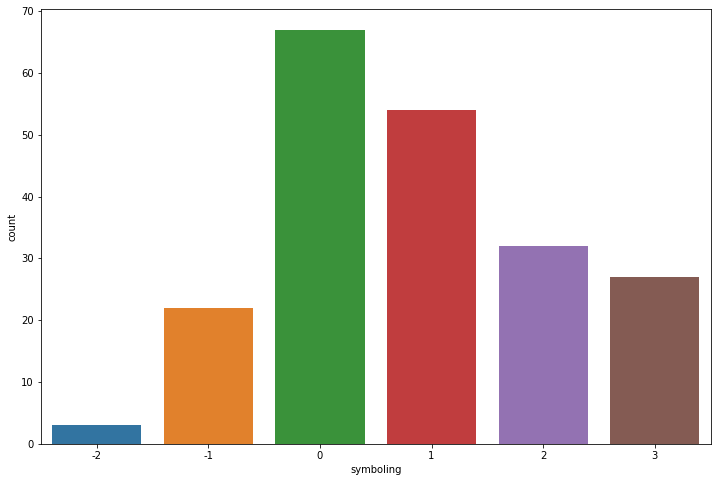

In [32]:
# "car_ID" sütununu görmezden gelirsek, dataframe'in ilk sütununda "symboling" var.
# Bu sütunu inceleyerek başlayalım.
# symboling -> sigorta riski

plt.figure(figsize=(12, 8))
sns.countplot(data["symboling"])
plt.show()

# Aşağıdaki grafikte [-2, 3] aralığı risk katsayısını belirtir.
# Buna göre;
    # -2: en az sigorta riskine sahip arabaları,
    # 0:  ortalama sigorta riskine sahip arabaları,
    # 3: en yüksek sigorta riskine sahip arabaları,
# ifade eder.

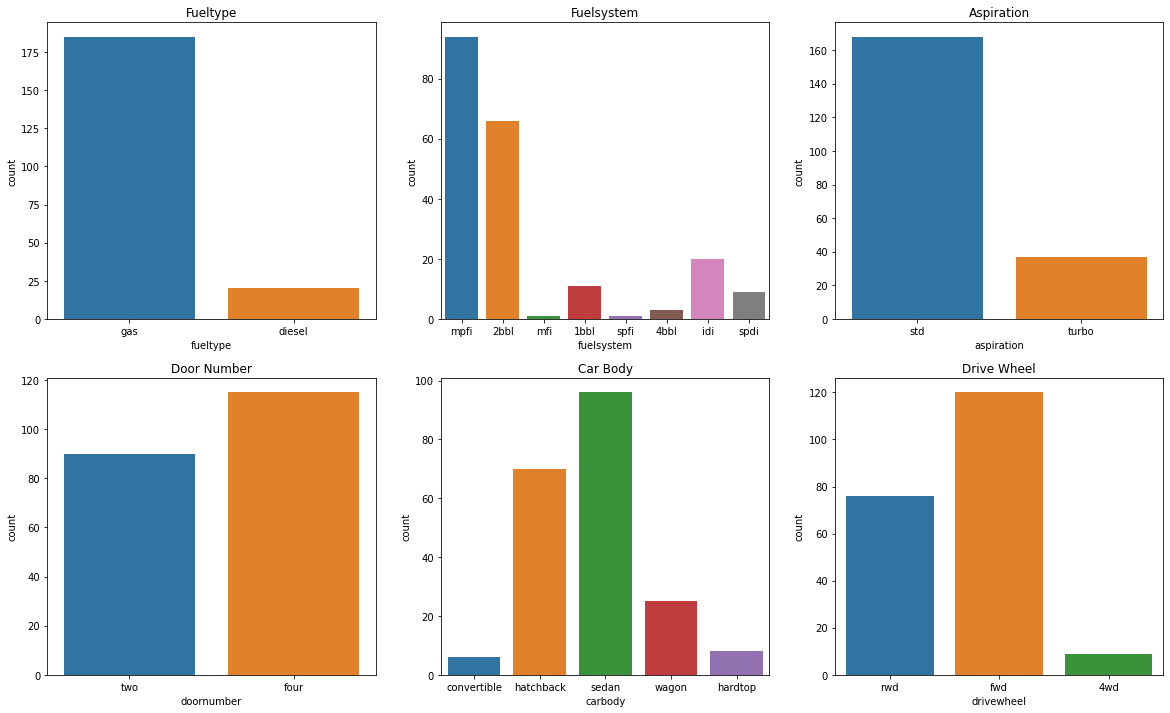

In [33]:
# Şimdi de her bir sütun için tek tek Univariate Analysis yapalım
# plt.sublot(2, 3, 1) -> 2 satır, 3 sütun, 1. sıra

fig = plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.title("Fueltype")
sns.countplot(data["fueltype"])
# Benzinli (Gas) araçlar çoğunlukta.

plt.subplot(2, 3, 2)
plt.title("Fuelsystem")
sns.countplot(data["fuelsystem"])
# MPFI (Multi Point Fuel Injection) sistemi yeni teknoloji olduğu için daha çok tercih edilmiş.

plt.subplot(2, 3, 3)
plt.title("Aspiration")
sns.countplot(data["aspiration"])
# Aspiration, çoğunlukla standart beslemeli.

plt.subplot(2, 3, 4)
plt.title("Door Number")
sns.countplot(data["doornumber"])
# 4 kapılı araçlar çoğunlukta.

plt.subplot(2, 3, 5)
plt.title("Car Body")
sns.countplot(data["carbody"])
# Sedan tipi araçlar çoğunlukta

plt.subplot(2, 3, 6)
plt.title("Drive Wheel")
sns.countplot(data["drivewheel"])
# Çekiş sistemi olarak FWD yani önden çekişli araçlar çoğunlukta.

plt.show()

***

### İkili (Bivariate) Analiz

* Amacımız feature'ların price değerini nasıl ve ne derece etkilediğini bulmak. Bu nedenle her bir feature(sütun) ile price değerini ikili olarak inceleyelim.

In [34]:
data.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Manufacturer-Price İlişkisi

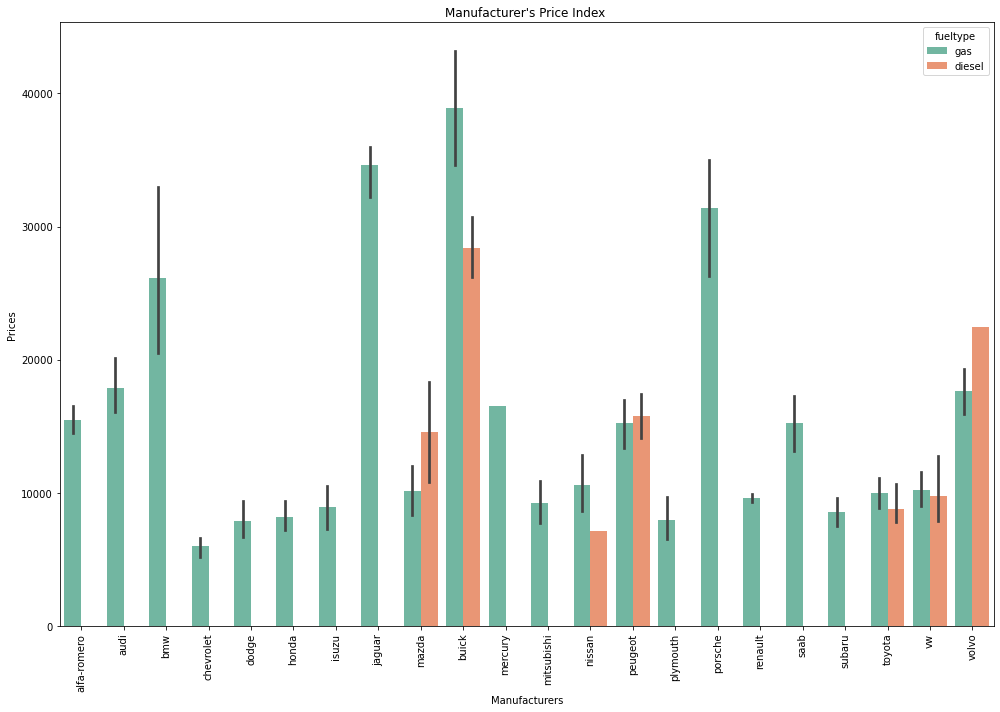

In [35]:
# Otomobil üreticilerinin ürettikleri araçların ortalama fiyatlarını yazdıralım.

plt.figure(figsize=(14, 10))
plt.title("Manufacturer's Price Index ")

# hue=data["fueltype"] : araçların yakıt tiplerine göre değişen fiyatlarını da grafiğe dahil et.
sns.barplot(x=data["manufacturer"], y=data["price"], hue=data["fueltype"], palette="Set2")

plt.xticks(rotation=90)
plt.xlabel("Manufacturers")
plt.ylabel("Prices")
plt.tight_layout()  
plt.show()

#### Symboling - Price İlişkisi

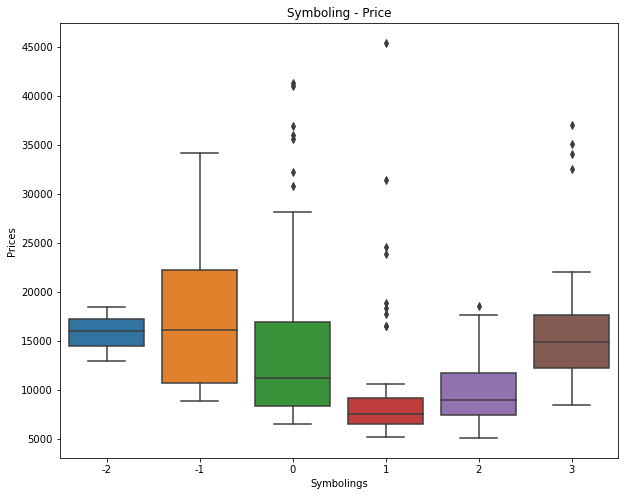

In [36]:
plt.figure(figsize=(10, 8))

sns.boxplot(x=data["symboling"], y=data["price"])

plt.title("Symboling - Price")
plt.xlabel("Symbolings")
plt.ylabel("Prices")
plt.show()

#### Fueltype - Prices İlişkisi

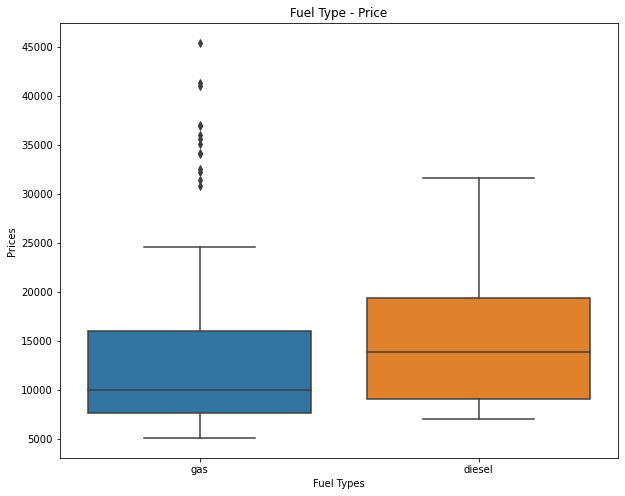

In [37]:
plt.figure(figsize=(10, 8))

sns.boxplot(x=data["fueltype"], y=data["price"])

plt.title("Fuel Type - Price")
plt.xlabel("Fuel Types")
plt.ylabel("Prices")
plt.show()

#### Engine Location - Price İlişkisi

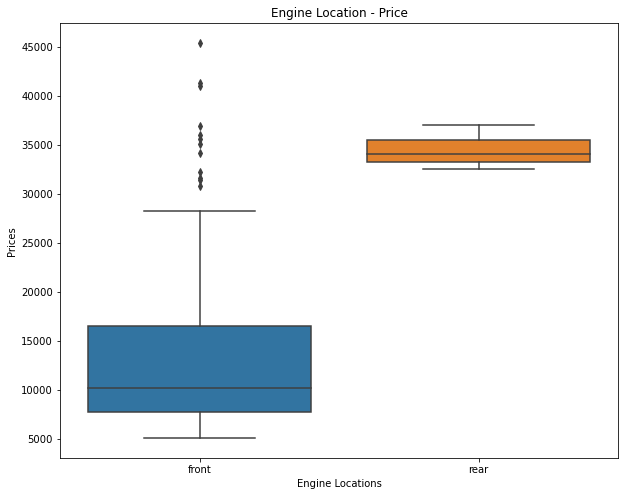

In [38]:
plt.figure(figsize=(10, 8))

sns.boxplot(x=data["enginelocation"], y=data["price"])

plt.title("Engine Location - Price")
plt.xlabel("Engine Locations")
plt.ylabel("Prices")
plt.show()

# Engine Location feature'unda çoğunlukla motoru önde olan araçlar mevcut ve bu araçların fiyatları daha ucuz.
# Motoru arkada olan araçların fiyatları daha pahalı.

#### Cylinder Number - Price İlişkisi

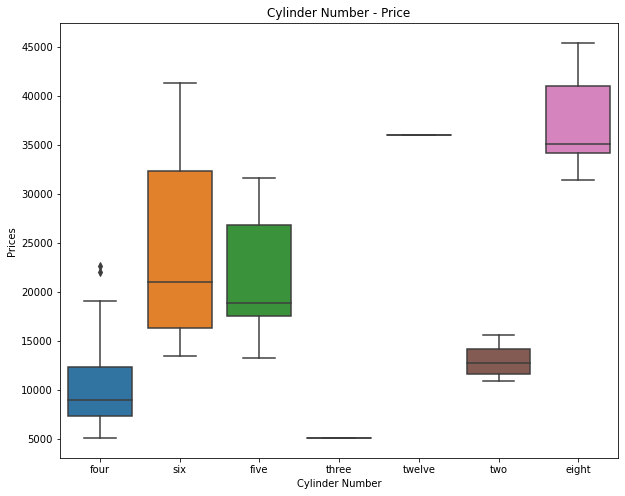

In [39]:
plt.figure(figsize=(10, 8))

sns.boxplot(x=data["cylindernumber"], y=data["price"])

plt.title("Cylinder Number - Price")
plt.xlabel("Cylinder Number")
plt.ylabel("Prices")
plt.show()

# Silindir sayısı ile fiyat arasında görece pozitif korelasyon var diyebiliriz.
# Ancak bazı istisnalar da mevcut.

***

### Fiyatın Kendi İçerisinde Dağılımı

* Şimdi de salt fiyat verisinin nasıl kümelendiğini inceleyelim.

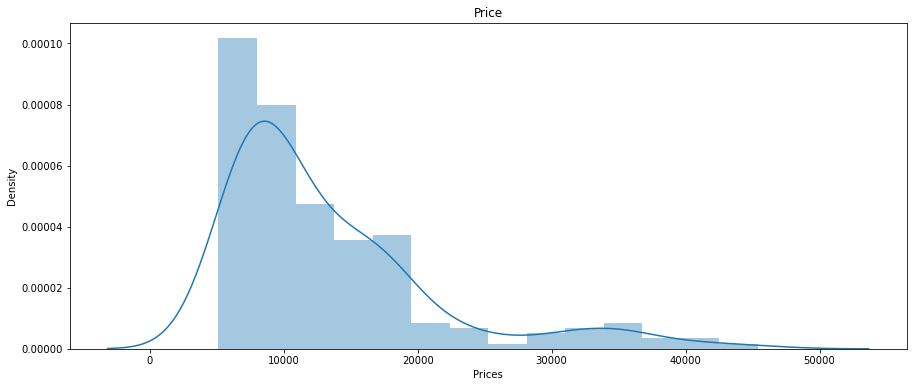

In [40]:
plt.figure(figsize=(15, 6))

sns.distplot(data["price"])

plt.title("Price")
plt.xlabel("Prices")
plt.show()

# Görüldüğü üzere araçların büyük bir çoğunluğu 5000$ ile 25000$ aralığında dağılıyor.

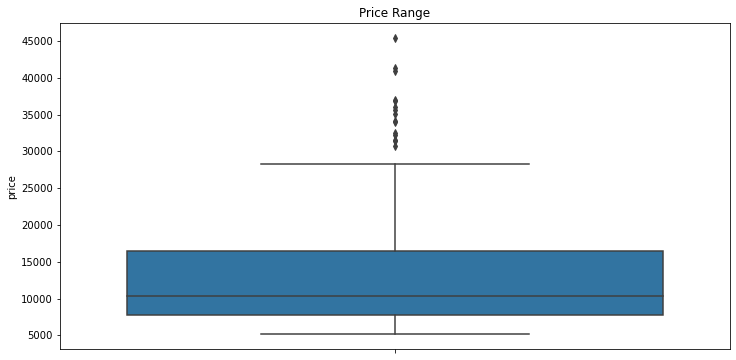

In [41]:
plt.figure(figsize=(12, 6))

plt.title("Price Range")
sns.boxplot(y=data["price"])
plt.show()

# Bu grafikte de çok net bir şekilde fiyat dağılım aralığı ve çoğunlukta olduğu noktalar görünüyor.

In [42]:
# Fiyat verisine istatistiksel bilgiler üzerinden yaklaşalım.

data["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

**Görüldüğü üzere otomobil fiyatlarının ortalaması `13276.71` düzeyinde. Bununla birlikte araç fiyatlarının standart sapması `7988.85` düzeyinde. Yani fiyatlar yoğunlukla `13276.71 + 7988.85` ile `13276.71 - 7988.85` aralığında değişiyor.**

***

### Pair-Plot (İkili Grafik) Kullanarak Feature-Price İlişkilerini Görelim

In [43]:
data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [44]:
# Yukarıdaki sütunlardan yalnızca şunları alalım:

cols = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight",
       "enginesize", "boreratio", "stroke", "compressionratio", "horsepower",
       "peakrpm", "citympg", "highwaympg"]

In [45]:
len(cols)

13

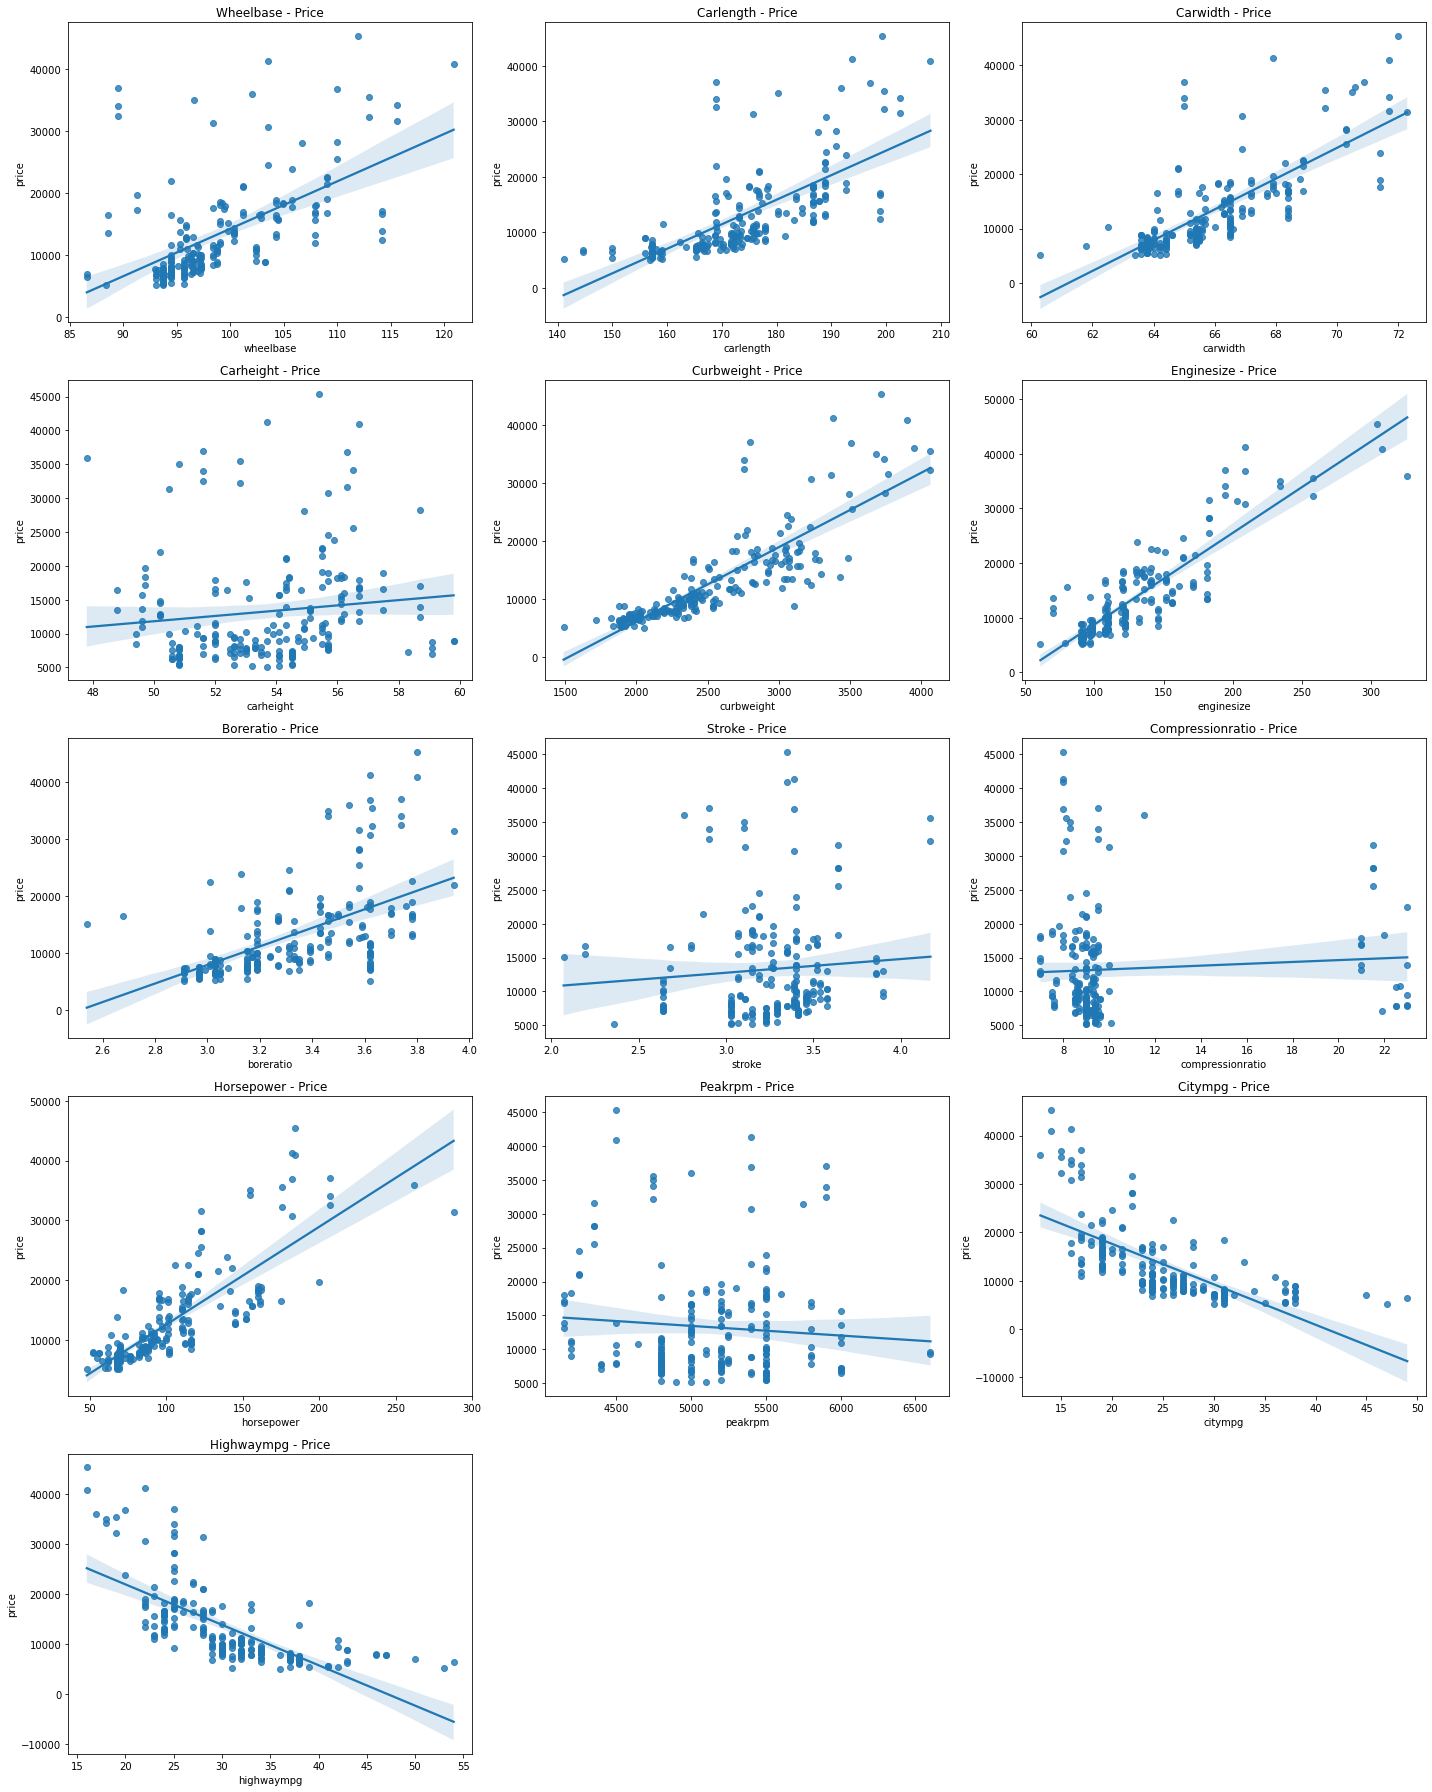

In [46]:
# Regresyon doğruları kullanarak ilişkileri inceleyelim.

plt.figure(figsize=(20, 25))

for i in range(len(cols)):
    plt.subplot(5, 3, i+1)
    plt.title(cols[i].capitalize() + " - Price")
    sns.regplot(x=eval("data" + "[cols[i]]"), y=data["price"])
    
plt.tight_layout()
plt.show()

**Yukarıdaki regresyon grafiklerine baktığımızda hangi feature'ların ne fiyat sonucunu nasıl etkilediği konusunda bazı fikirler üretebiliriz. Ancak burada asıl önemli olan `etkileme` durumundan ziyade `etkilememe` durumudur. Fiyatı etkilemeyen feature'ları model yaratırken kullanmanın bir anlamı yoktur. Modelimiz daha hızlı çalışsın istiyorsak bu gibi feature'ları üzerinde çalıştığımız veri setinden çıkarmakta fayda var.**

* **Buna göre, fiyatı etkilemeyen feature'lar:**
    * carheight
    * stroke
    * compression ratio
    * peak rpm
    * highway mpg
    * city mpg
    
**Bu feature'ları veri setimizden çıkarabiliriz.**

In [47]:
# Sütunları yeniden inceleyelim

data.columns

Index(['car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [48]:
# Yeni sütunları seçerek yeni data oluşturalım.

dataNew_df = data[[
        'car_ID', 'symboling', 'fueltype', 'manufacturer', 'aspiration',
        'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
        'carlength', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber',
        'enginesize', 'fuelsystem', 'boreratio', 'horsepower', 'price']]

In [49]:
dataNew_df.head()

,car_ID,symboling,fueltype,manufacturer,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


**Şimdi de dataNew_df içerisindeki tüm sütunları ikili olarak (pair-plot) inceleyelim**

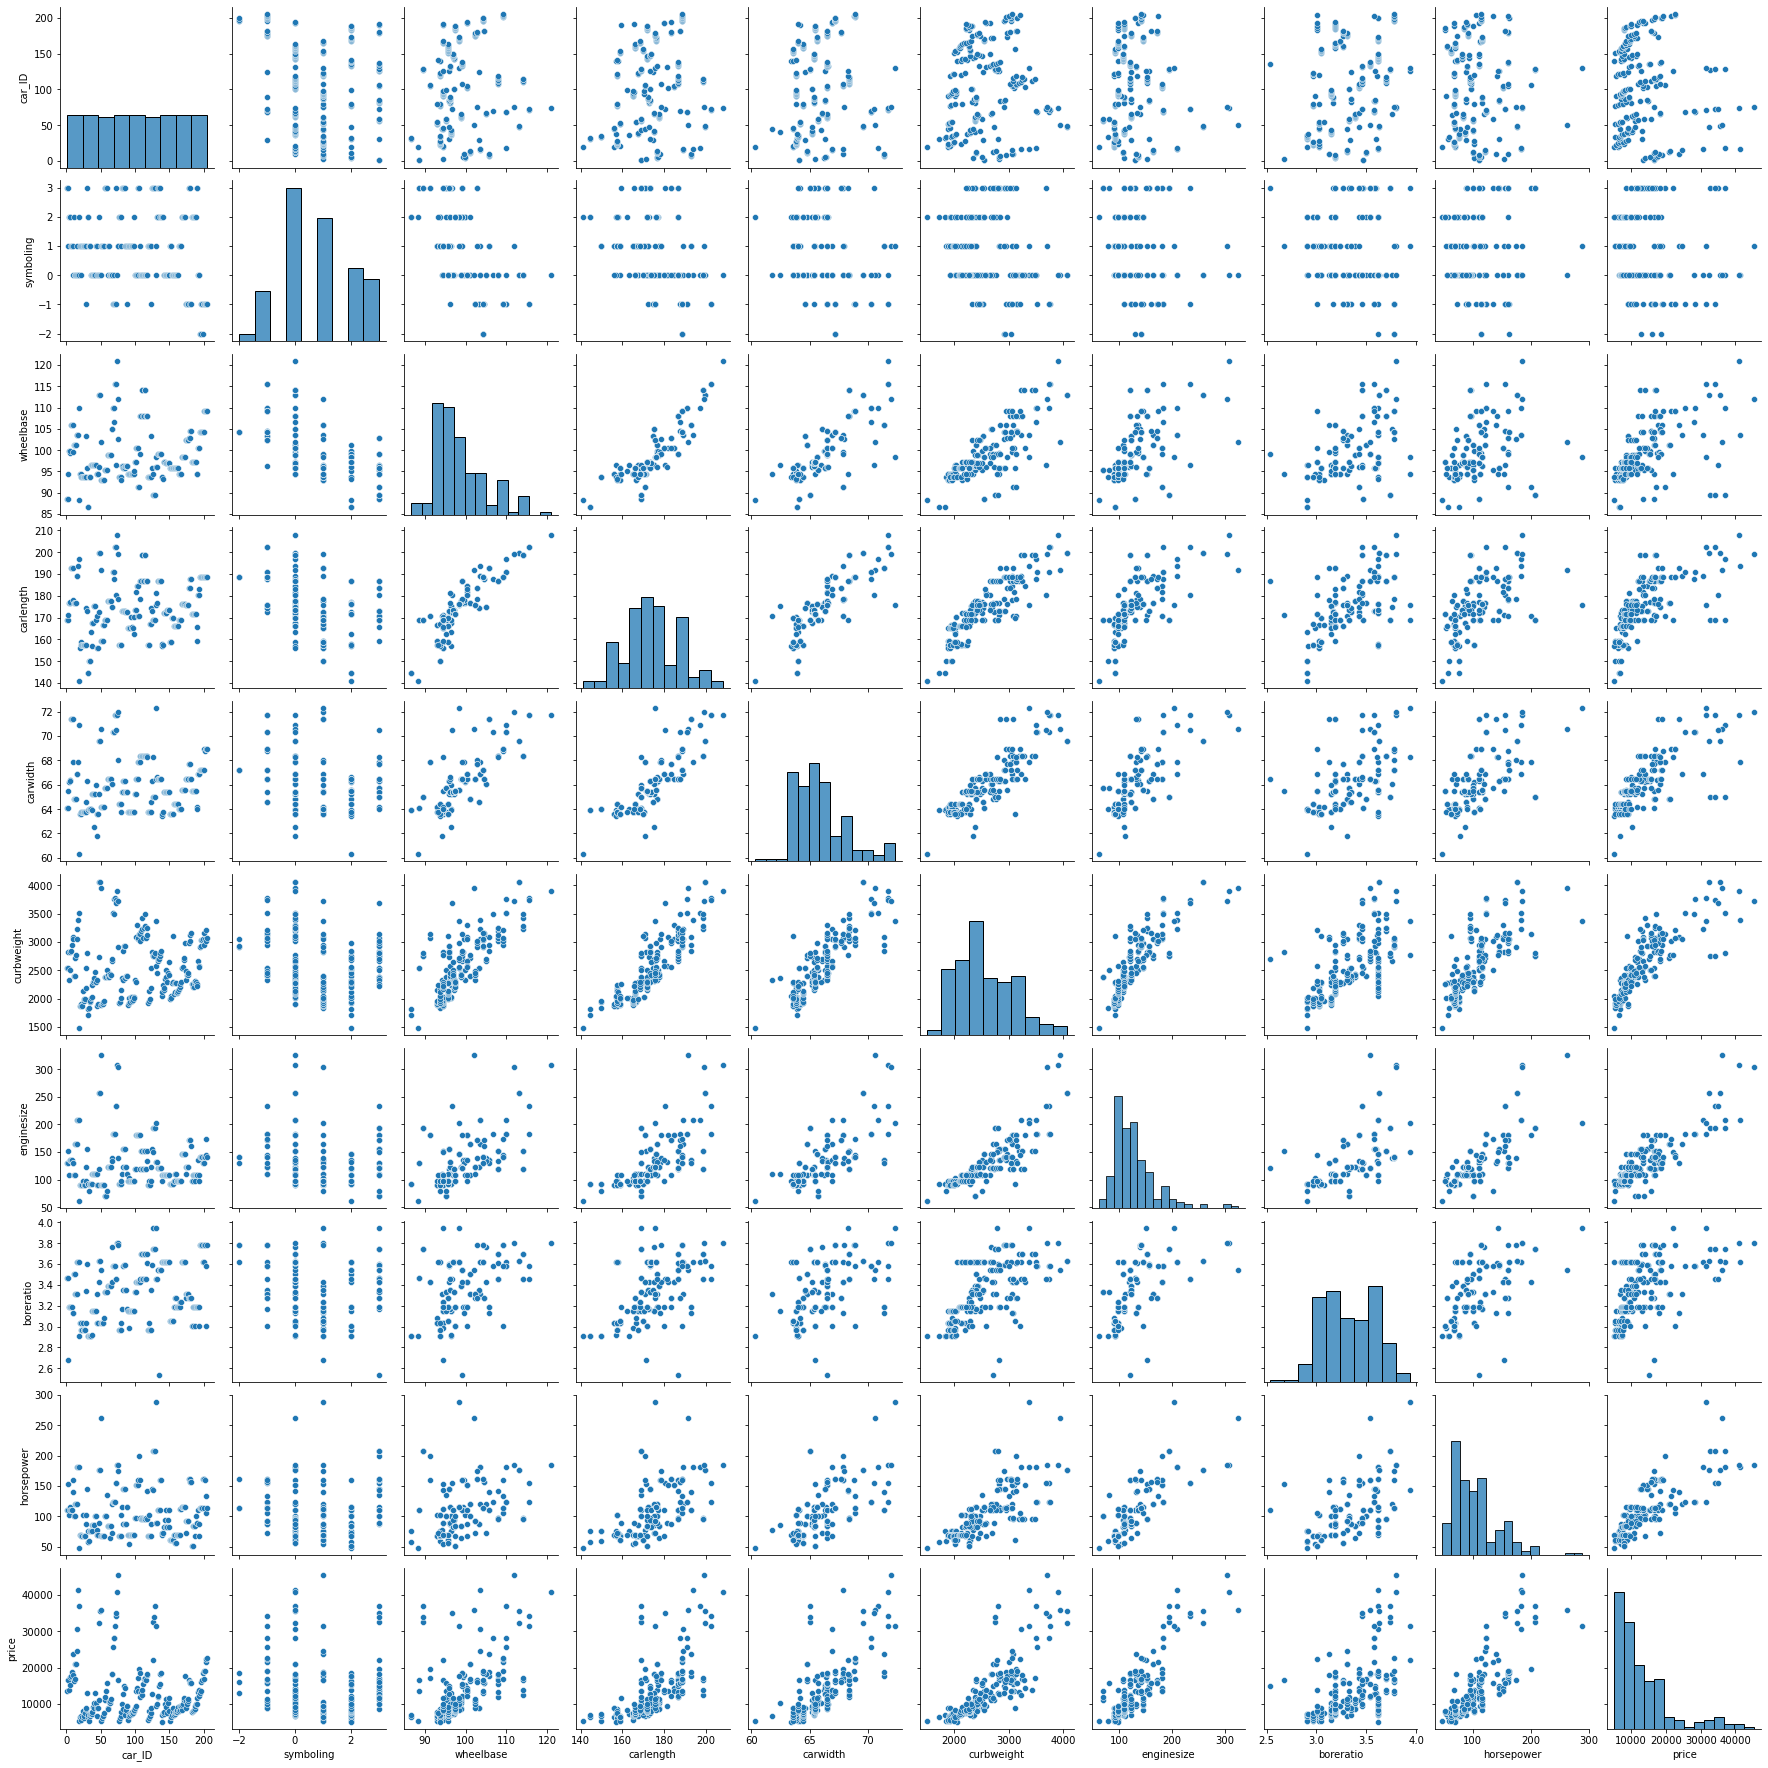

In [50]:
sns.pairplot(dataNew_df)
plt.show()

**Yukarıdaki grafikleri en sağda bulunan price değişkenine göre inceleyelim. Örneğin 7. sırada bulunan `enginesize` feature'u ile price değişkeni arasındaki ilişkiyi incelemek için 7. sıranın en sağındaki grafiğe bakmalıyız. Lineer bir artış var gibi.**

***

# $Feature Engineering$

* **Feature : Girdi / Input**

**Veriyi daha iyi modellemek için yeni özellikler/girdiler(feature) bulmak ya da yine aynı amaç doğrultusunda bazı özellikleri/feature'ları elemek şeklinde tanımlanan işe `FEATURE ENGINEERING` denir. Bu iş makine öğrenmesinde oldukça önemlidir.**